<a href="https://colab.research.google.com/github/Dheerajthummala/Text_mining/blob/main/Text_mining(elon_musk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import string
import spacy
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [119]:
!python -m spacy download en_core_web_sm

2024-01-05 06:53:40.578170: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 06:53:40.578227: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 06:53:40.580030: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 06:53:41.744505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [120]:
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('Elon_musk.csv',error_bad_lines=False,encoding='latin1')
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [121]:
data1=data.drop(['Unnamed: 0'],axis=1)

In [122]:
data1 = [Text.strip() for Text in data1.Text] # remove both the leading and the trailing characters
data1= [Text for Text in data1 if Text] # removes empty strings, because they are considered in Python as False
data1[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [123]:
# Joining the list into one string/text
text = ' '.join(data1)
text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [124]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [125]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won\x92t give you your private keys should

In [126]:
#Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_url_text)
print(text_tokens[0:50])

['kunalb11', 'I\x92m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [127]:
len(text_tokens)

20423

In [128]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [129]:
my_stop_words = stopwords.words('english')
irwords=['I\x92m']
my_stop_words.extend(irwords)
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It\x92s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'U0001F923U0001F923', 'Th

In [130]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb11', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year']


In [131]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [132]:
# lemmatizion
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:40])

kunalb11 alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks


In [133]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb11', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent']


In [134]:
# FEATURE EXTRACTION
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [135]:
print(vectorizer.vocabulary_)

{'kunalb11': 2039, 'alien': 229, 'idaacarmack': 1779, 'ray': 2943, 'trace': 3809, 'cyberpunk': 960, 'hdr': 1667, 'nextlevel': 2486, 'have': 1661, 'try': 3844, 'joerogan': 1960, 'spotify': 3435, 'great': 1600, 'interview': 1889, 'gtera27': 1618, 'doge': 1111, 'underestimate': 3974, 'teslacn': 3655, 'congratulation': 853, 'tesla': 3649, 'china': 738, 'amazing': 255, 'execution': 1322, 'last': 2056, 'year': 4245, 'now': 2525, 'next': 2485, 'even': 1293, 'happy': 1648, 'new': 2482, 'ox': 2643, 'frodo': 1486, 'underdoge': 3973, 'all': 232, 'thought': 3733, 'would': 4220, 'fail': 1358, 'himself': 1713, 'owenspark': 2639, 'flcnhvy': 1428, 'anonyx10': 284, 'haha': 1633, 'thanks': 3692, 'indeed': 1828, 'tweet': 3863, 'definitely': 1014, 'represent': 3025, 'realworld': 2968, 'time': 3751, 'allocation': 234, 'the': 3699, 'entertaining': 1250, 'outcome': 2619, 'likely': 2117, 'givedirectly': 1570, 'just': 1987, 'send': 3209, 'agree': 200, 'clubhouse': 779, 'kanyewest': 1996, 'geoffkeighley': 1550,

In [148]:
print(vectorizer.get_feature_names_out()[100:300])
print(X.toarray()[100:300])

['4thfromourstar' '50' '50000' '50k' '60' '60000' '65' '69420' '6f' '6k'
 '727' '727pm' '74' '78' '7th' '90' '9007' '91demigod' '922' '948' '95'
 '99' '9inety6prince' 'aber' 'able' 'abo' 'aboard' 'abort' 'about' 'above'
 'absence' 'absolute' 'absolutely' 'absorb' 'absorption' 'absurd'
 'absurdly' 'ac' 'academia' 'accel' 'accelera' 'accelerate' 'acceleration'
 'accelerator' 'accept' 'acceptable' 'access' 'accessible' 'accident'
 'accidental' 'accommodate' 'account' 'accura' 'accuracy' 'accurate' 'ace'
 'achieve' 'achievement' 'achy' 'acquisition' 'across' 'action' 'active'
 'activity' 'actual' 'actuall' 'actually' 'actuary' 'adagio' 'adamblitzer'
 'adamhoov' 'adamkiotz' 'adamklotz' 'add' 'additive' 'address'
 'adlanbogatyryov' 'administer' 'adolfomorenos' 'adult' 'advanc' 'advance'
 'advanced' 'advantage' 'adventure' 'advertise' 'advice' 'advise' 'aero'
 'afb' 'affair' 'affect' 'affordable' 'afloathickory' 'africa' 'after'
 'afternoon' 'age' 'ago' 'agony' 'agree' 'ah' 'ahead' 'ahem'
 'a

In [149]:
print(X.toarray().shape)

(15108, 4277)


In [150]:
words=' '.join(lemmas)
words

'kunalb11 alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably wel

In [139]:
# 2) bigrams and trigrams
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)

In [140]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ajtourville' 'also' 'amp' 'big' 'car' 'cleantechnica' 'come'
 'cool' 'could' 'crew' 'day' 'dragon' 'earth' 'engine' 'ercxspace'
 'erdayastronaut' 'evafoxu' 'exactly' 'falcon' 'felixschlang' 'first'
 'flcnhvy' 'flight' 'get' 'go' 'good' 'great' 'haha' 'hard' 'high'
 'idaacarmack' 'it' 'kristennetten' 'land' 'launch' 'lexfridman' 'like'
 'lot' 'make' 'marcushousegame' 'maybe' 'mission' 'model' 'much' 'nasa'
 'nasaspaceflight' 'need' 'neuralink' 'new' 'next' 'no' 'not' 'one'
 'people' 'ppathole' 'pretty' 'probably' 'production' 'rationaletienne'
 're' 'right' 'rt' 'soon' 'spacestation' 'spacex' 'starship' 'still'
 'sure' 'take' 'tesla' 'teslaownerssv' 'teslarati' 'tesmaniancom' 'test'
 'that' 'the' 'there' 'thesheetztweetz' 'they' 'think' 'this' 'time'
 'tobyliiiiiiiiii' 'true' 'u0001f923u0001f923' 'use' 'way' 'we' 'we re'
 'week' 'well' 'wholemarsblog' 'will' 'work' 'would' 'yeah' 'year' 'yes'
 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 

In [141]:
#TFidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 100)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print(vectorizer_n_gram_max_features.get_feature_names_out())
print(tf_idf_matrix_n_gram_max_features.toarray())

['actually' 'ajtourville' 'also' 'amp' 'big' 'car' 'cleantechnica' 'come'
 'cool' 'could' 'crew' 'day' 'dragon' 'earth' 'engine' 'ercxspace'
 'erdayastronaut' 'evafoxu' 'exactly' 'falcon' 'felixschlang' 'first'
 'flcnhvy' 'flight' 'get' 'go' 'good' 'great' 'haha' 'hard' 'high'
 'idaacarmack' 'it' 'kristennetten' 'land' 'launch' 'lexfridman' 'like'
 'lot' 'make' 'marcushousegame' 'maybe' 'mission' 'model' 'much' 'nasa'
 'nasaspaceflight' 'need' 'neuralink' 'new' 'next' 'no' 'not' 'one'
 'people' 'ppathole' 'pretty' 'probably' 'production' 'rationaletienne'
 're' 'right' 'rt' 'soon' 'spacestation' 'spacex' 'starship' 'still'
 'sure' 'take' 'tesla' 'teslaownerssv' 'teslarati' 'tesmaniancom' 'test'
 'that' 'the' 'there' 'thesheetztweetz' 'they' 'think' 'this' 'time'
 'tobyliiiiiiiiii' 'true' 'u0001f923u0001f923' 'use' 'way' 'we' 'we re'
 'week' 'well' 'wholemarsblog' 'will' 'work' 'would' 'yeah' 'year' 'yes'
 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]

In [142]:
# word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

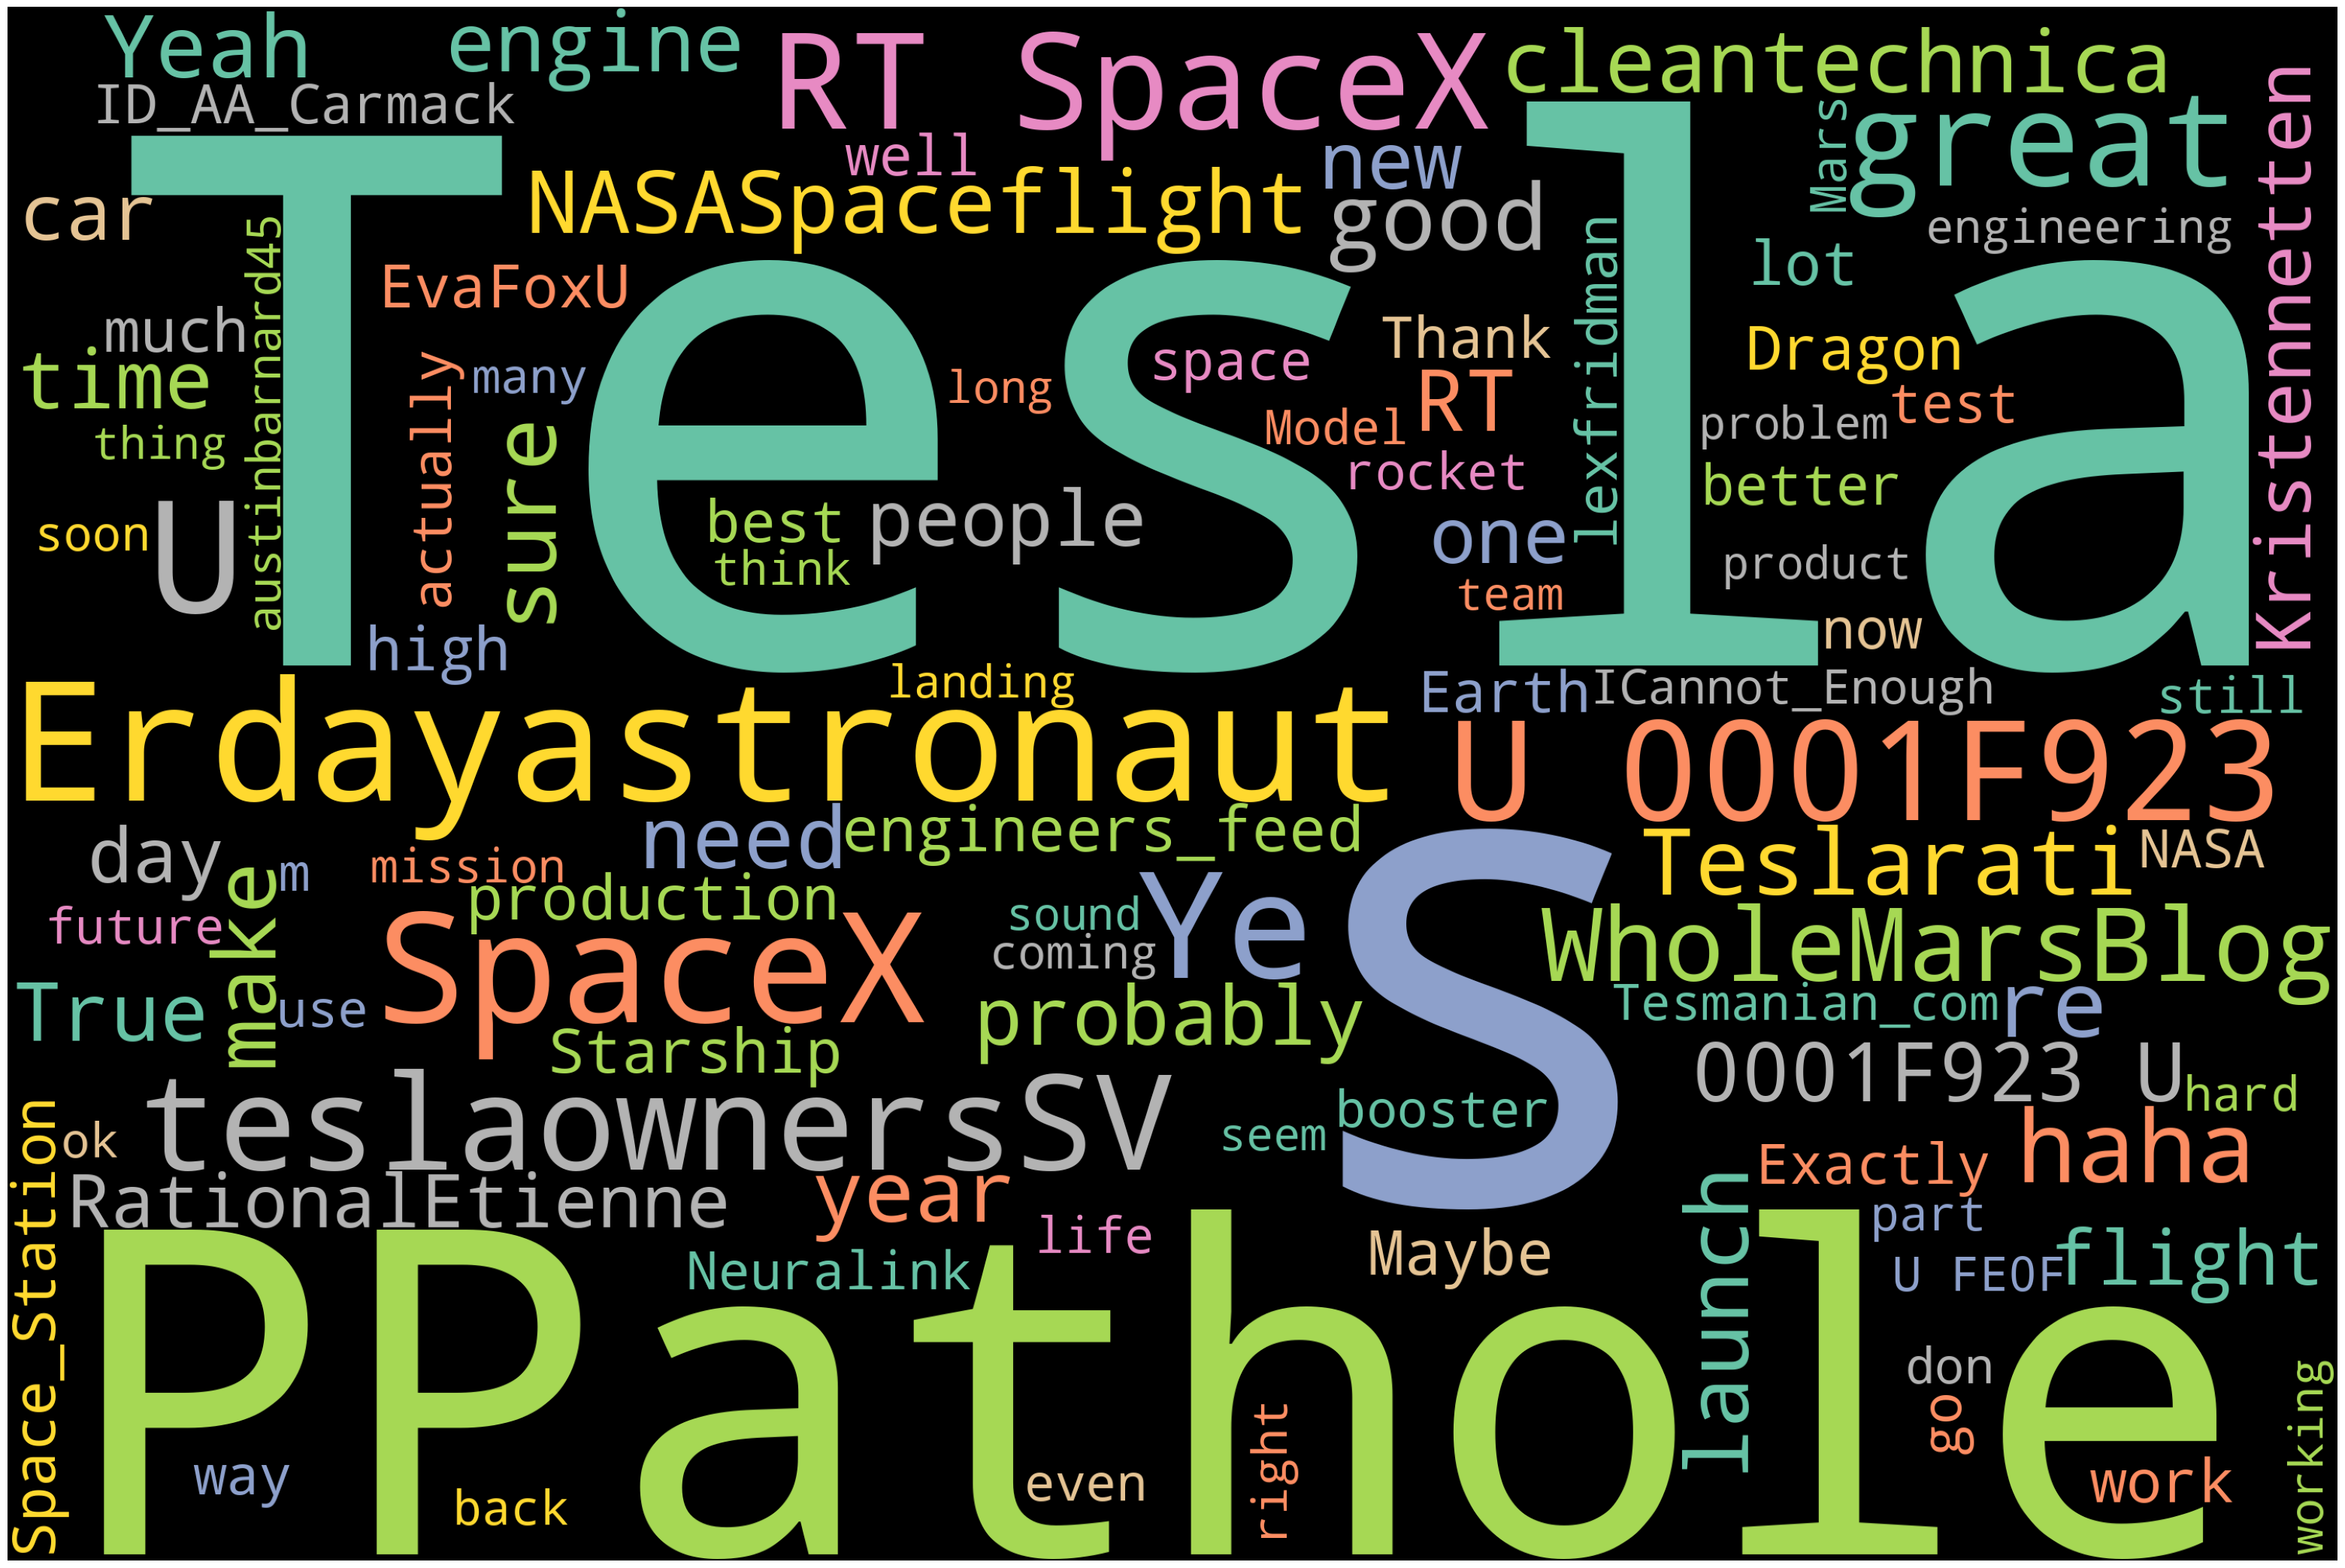

In [143]:
#Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('https')
stopwords.add('t')
stopwords.add('co')
stopwords.add('amp')
stopwords.add( 'flcnhvy')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [152]:
# NAMED ENTITY RECOGNITION
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [156]:
one_block = words
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [157]:
one_block

'kunalb11 alien idaacarmack ray trace cyberpunk hdr nextlevel have try joerogan spotify great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owenspark flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweet definitely represent realworld time allocation the entertaining outcome likely givedirectly just send just agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 this true power haha freewalletorg any crypto wallet won\x92t give private key avoid cost freewalletorg your app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes blkmdl3 rationaletienne adamklotz once predict cash flow reasonably wel

In [158]:
for token in doc_block[0:20]:
    print(token, token.pos_)

kunalb11 PROPN
alien PROPN
idaacarmack PROPN
ray PROPN
trace NOUN
cyberpunk NOUN
hdr NOUN
nextlevel NOUN
have AUX
try VERB
joerogan PROPN
spotify VERB
great ADJ
interview NOUN
gtera27 NOUN
doge PROPN
underestimate ADJ
teslacn PROPN
congratulation PROPN
tesla PROPN


In [159]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['spotify', 'interview', 'gtera27', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'send', 'agree', 'get', 'buy']


In [160]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,spacex,193
1,tesla,100
2,erdayastronaut,83
3,make,64
4,launch,62
5,amp,49
6,year,48
7,need,47
8,work,47
9,go,43


<Axes: title={'center': 'Top verbs and nouns'}, xlabel='word'>

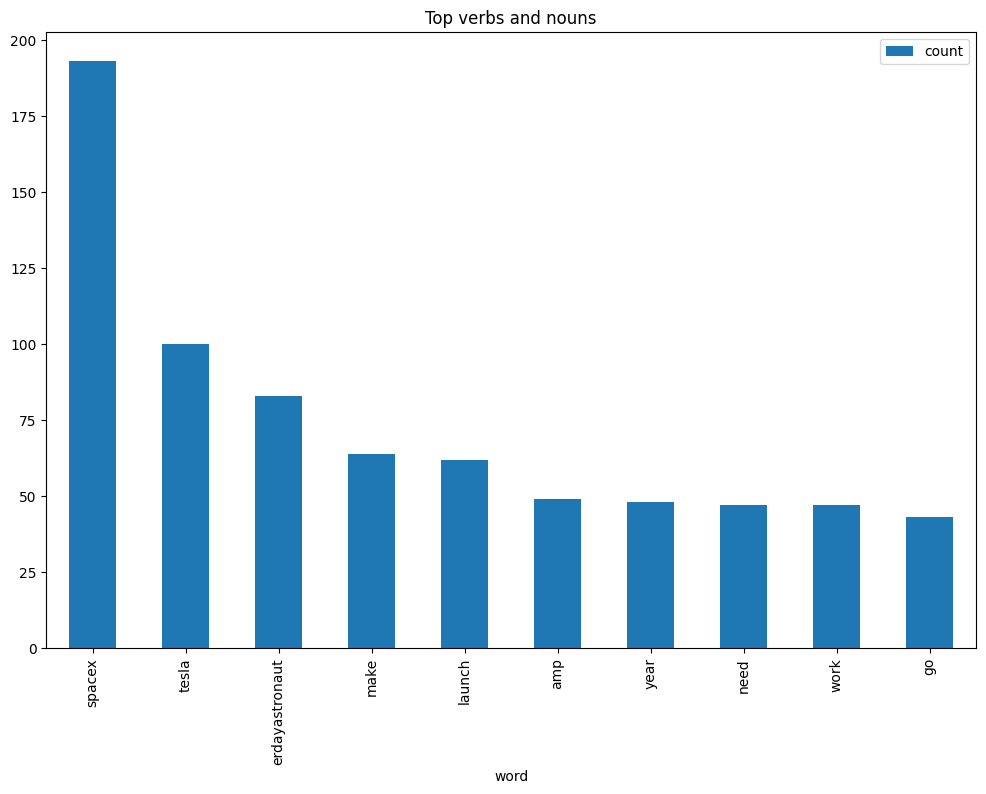

In [161]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

In [164]:
# SENTIMENTAL ANAALYSIS
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data1))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elem

In [165]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [167]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [173]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [174]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [175]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [176]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [177]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [178]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
923,"It may never pay out, as the stock cant b ht...",-4,31
683,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [179]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

In [180]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [181]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10
9,The most entertaining outcome is the most like...,3,109
17,Back to work I go @CapybaraSurfer @MattWallace...,4,38
...,...,...,...
914,He was one of the very best.,3,7
916,"@Ali_Afshari In general, we need to improve ho...",4,87
918,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",3,15
920,This is both great &amp; terrifying.,3,6


<Axes: xlabel='sentiment_value', ylabel='Density'>

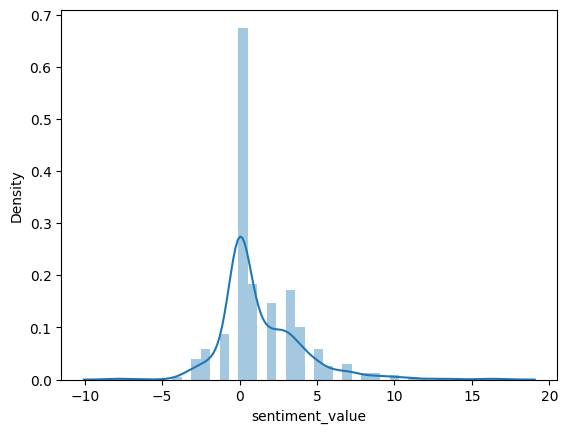

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

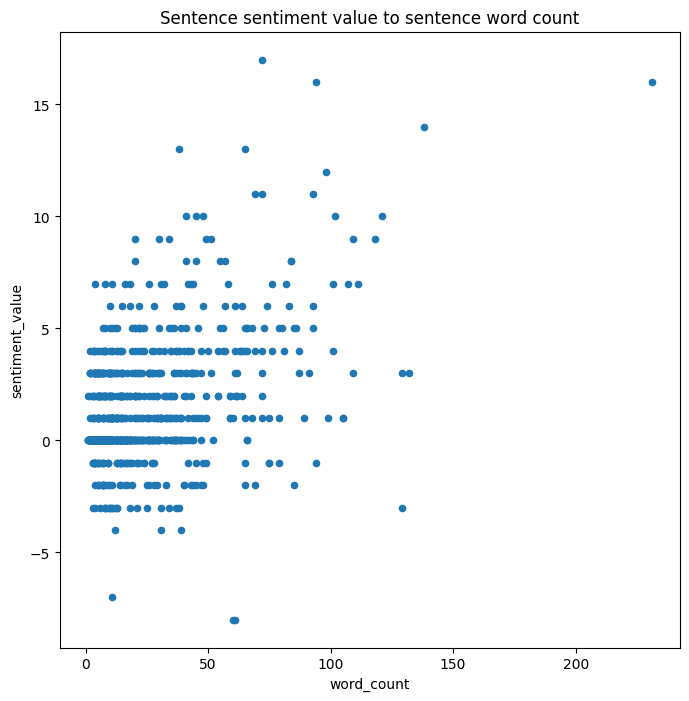

In [186]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')